# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

## Response Q1:
The most profitable item is the state's selling point, minus the state's cost to buy, times the units sold.\

Text(0, 0.5, 'Gross Profit')

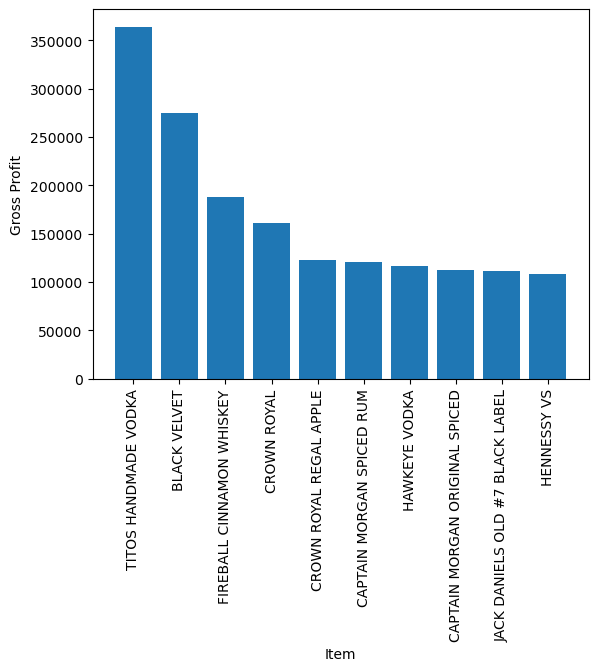

In [2]:
liquor_data = pd.read_csv("data/iowa.csv")
liquor_data["profit"] = liquor_data["Bottles Sold"]*(liquor_data["State Bottle Retail"] - liquor_data["State Bottle Cost"])
grouped_data = liquor_data[["Item Description", "profit"]].groupby(by="Item Description",as_index=False).sum().sort_values(by="profit", ascending=False).head(10)
plt.xticks(rotation=90)
plt.bar(grouped_data["Item Description"], grouped_data["profit"])
plt.xlabel("Item")
plt.ylabel("Gross Profit")

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [ ]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

: 

In [ ]:
x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

: 

In [ ]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

: 

In [ ]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

: 

## Response Q2:
With unmodified variables, x-y results in a "ValueError operands could not be broadcast together with shapes (3,) (2,)" as the two shapes are incompatible. \
With the reshaped variables, you get array([[-1,  1,  3],[-4, -2,  0]]), a matrix.


Answer 1:

In [ ]:
result = []
for xi in x:
    temp = []
    for yi in y:
        temp.append(xi-yi)
    result.append(temp)
result

[[np.int64(-1), np.int64(-4)],
 [np.int64(1), np.int64(-2)],
 [np.int64(3), np.int64(0)]]

: 

Answer 2:

In [ ]:
result = []
for yi in y:
    temp = []
    for xi in x:
        temp.append(xi-yi)
    result.append(temp)
result

[[np.int64(-1), np.int64(1), np.int64(3)],
 [np.int64(-4), np.int64(-2), np.int64(0)]]

: 

In [ ]:
print(x.reshape(1,-1).shape)
print(x.reshape(-1,1).shape)

(1, 3)
(3, 1)


: 

For `x.reshape(1,-1)`, the operation turns the vector of length 3 to a matrix of shape 1,3. For `x.reshape(-1,1)`the operation turns the vector of length 3 to a matrix of shape 3,1. Thus allowing matrix operations to be performed.

___________________________________________________________________________________________________________________

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

In [ ]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:


: 

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

## Response Q4:

In [3]:
def compute_quantile(input_np_array, target_quantile):
    cached_len = len(input_np_array)
    quantiles = list(map(lambda point: sum(input_np_array<point), input_np_array))
    zipped_data = np.array([input_np_array,quantiles])

    return zipped_data





    zipped_data.sort()
    lower = np.searchsorted(zipped_data[1], target_quantile)
    if lower >= len(zipped_data[1]):
        return zipped_data[0][-1]
    else:
        lower_index = lower
        upper_index = lower + 1
        lower_quantile = zipped_data[1][lower_index]
        upper_quantile = zipped_data[1][upper_index]
        if (upper_quantile-lower_quantile) == 0:
            return zipped_data[0][lower_index]
        else:
            diff = (upper_quantile-lower_quantile)
        quantile_difference = (target_quantile-lower_quantile)/(diff)
        data_difference = quantile_difference * (zipped_data[0][upper_index] - zipped_data[0][lower_index])
        return zipped_data[0][lower_index]+data_difference
    
def compute_IQR_and_friends(input_data):
    quantile_25 = compute_quantile(input_data, 0.25)
    quantile_75 = compute_quantile(input_data, 0.75)
    IQR = quantile_75 - quantile_25
    lower_whisker = quantile_25-(1.5*IQR)
    upper_whisker = quantile_75+(1.5*IQR)
    return (IQR, lower_whisker, upper_whisker, quantile_25, quantile_75)

def five_num_sum(input_data):
    IQR, lower_whisker, upper_whisker, quantile_25, quantile_75 = compute_IQR_and_friends(input_data)
    return (min(input_data),quantile_25, compute_quantile(input_data, 0.5), quantile_75, max(input_data), (lower_whisker, upper_whisker))



In [5]:
# sns.boxplot(liquor_data["Bottle Volume (ml)"])
# print(liquor_data["Bottle Volume (ml)"].describe())
compute_quantile(liquor_data["Bottle Volume (ml)"].dropna(), 0.25)

KeyboardInterrupt: 

In [ ]:
print(liquor_data["Bottle Volume (ml)"].dropna().describe())

count    159904.000000
mean        869.592737
std         513.812818
min          20.000000
25%         750.000000
50%         750.000000
75%        1000.000000
max        6000.000000
Name: Bottle Volume (ml), dtype: float64


: 

My result seems to be shifted upward a bit. Its consistent with the answers, and the min and max are the same, but the IQR markers and the median are shifted upwards.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?